In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt

In [2]:

def rotation_matrix_arbitrary_axis(axis, angle):
    """
    Returns a 3D rotation matrix for rotating around an arbitrary axis by a given angle (in radians).
    
    :param axis: A 3D unit vector representing the axis of rotation (array-like or list).
    :param angle: The angle in radians by which to rotate.
    :return: A 3x3 rotation matrix.
    """
    axis = np.array(axis)
    axis = axis / np.linalg.norm(axis)  # Ensure the axis is a unit vector
    
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    one_minus_cos = 1 - cos_theta
    
    # Skew-symmetric matrix of the axis
    K = np.array([
        [0, -axis[2], axis[1]],
        [axis[2], 0, -axis[0]],
        [-axis[1], axis[0], 0]
    ])
    
    # Outer product of the axis
    outer_product = np.outer(axis, axis)
    
    # Rotation matrix using Rodrigues' formula
    R = cos_theta * np.eye(3) + one_minus_cos * outer_product + sin_theta * K
    
    return R

def rotate_vector_arbitrary_axis(vector, axis, angle):
    """
    Rotates a 3D vector around an arbitrary axis by a given angle (in radians).
    
    :param vector: A 3D vector to rotate (as a list or numpy array).
    :param axis: A 3D unit vector representing the axis of rotation.
    :param angle: The angle in radians by which to rotate the vector.
    :return: The rotated 3D vector.
    """
    rot_matrix = rotation_matrix_arbitrary_axis(axis, angle)
    rotated_vector = np.dot(rot_matrix, vector)
    return rotated_vector

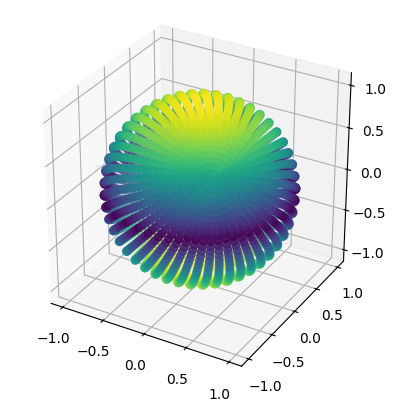

In [5]:
# Ball:
# rotate pointset
cm = plt.get_cmap("RdYlGn")


# make random axis ang angle 
import random

r_axis = np.asarray([np.float32(random.uniform(0,1)), np.float32(random.uniform(0,1)), np.float32(random.uniform(0,1))])
r_angle = random.uniform(0,1.5708)
res = 50

# Make data
phis = np.linspace(0, 2 * np.pi, res)
thetas = np.linspace(0, np.pi, res)
x,y,z,col = np.empty((0)), np.empty((0)),np.empty((0)), np.empty((0))

for phi in phis:
    for theta in thetas:
        x =  np.append(x,np.cos(phi)*np.sin(theta))
        y =  np.append(y,np.sin(phi)*np.sin(theta))
        z =  np.append(z,np.cos(theta))

# rotate and stack the points
points = np.vstack((np.vstack((x,y)),z))
rot_mat = rotation_matrix_arbitrary_axis(r_axis, r_angle)
points = rot_mat@points[:,:]

# # now evaluate points according to z-value 

for point in points.T:
        col = np.append(col,np.abs( point[2]))


# now stack
points = np.vstack((points,col))

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(points[0,:], points[1,:], points[2,:], s=30, c=points[3,:], marker='o')                                                                                
ax3D.set_aspect('equal')

plt.show()  